## CNN trained on MNIST for Kaggle competition

In [1]:
import numpy as np; import pandas as pd
import torch

import matplotlib.pyplot as plt
from load_data import load_dataset
from net_architecture import NumberNet
from solver import Solver

In [2]:
training_file = "mnist_datasets/train.csv"
testing_file = "mnist_datasets/test.csv"


train_set, val_set = load_dataset(training_file, split = 0.85)
test_loader = load_dataset(testing_file)

model = NumberNet()

# If we want to load an old model:
load_old = True
if load_old:
    model_name = 'model2020-03-18.20.30'
    file_name = 'saved_models/' + model_name + '.pt'

load_model = True
# Here we can load an old model if we want to evaluate it. 
if load_model:
    model.load_state_dict(torch.load(file_name))

kwargs = {'learning_rate': 1e-4,
          'batch_size' :   64,
          'lr_rate_decay': 0.5,
          'decay_every_': 1}

solver = Solver(model, train_set, val_set, test_loader, **kwargs)

In [3]:
solver.train(5)

Started training. Will run for: 5 Epochs. Iterations per Epoch: 558.
Done with iteration: 175/558.
Done with iteration: 350/558.
Done with iteration: 525/558.
Epoch:1/5
Loss: 0.0047412291169166565 
Validation accuracy: 0.9984217171717171 
Training accuracy: 0.9961077508960573
Done with iteration: 175/558.
Done with iteration: 350/558.
Done with iteration: 525/558.
Epoch:2/5
Loss: 0.006882945541292429 
Validation accuracy: 0.9982638888888888 
Training accuracy: 0.9969478046594982
Done with iteration: 175/558.
Done with iteration: 350/558.
Done with iteration: 525/558.
Epoch:3/5
Loss: 0.10088561475276947 
Validation accuracy: 0.9982638888888888 
Training accuracy: 0.9971373552522746
Done with iteration: 175/558.
Done with iteration: 350/558.
Done with iteration: 525/558.
Epoch:4/5
Loss: 0.09997392445802689 
Validation accuracy: 0.9985795454545454 
Training accuracy: 0.9976413875103393
Done with iteration: 175/558.
Done with iteration: 350/558.
Done with iteration: 525/558.
Epoch:5/5
Loss

Plotting the results from the training

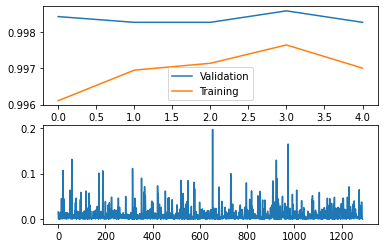

In [4]:
plt.subplot(2,1,1)
plt.plot(solver.val_acc_history[0:], label = 'Validation')
plt.plot(solver.train_acc_history[0:], label = 'Training')
plt.legend()

plt.subplot(2,1,2)
plt.plot(solver.train_loss_history[1500:])

Now we will load the test data, and generate the submission-file

In [5]:
solver.test_accuracy()

In [6]:
# Save the current model
from torch import save
from datetime import datetime

time = str(datetime.now())
time = time[:10] + '.' + time[11:13] + '.' + time[14:16]
file_name = f'saved_models/model{time}.pt'
save(model.state_dict(), file_name)